In [39]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn.preprocessing

In [63]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss

## RAPPEL MÉTRIQUES
--> elles se décomposent en **micro**, **macro** et **weighted** en général
- micro en général pour la généralisation de la classification binaire à la multi-labels
- macro comme une moyenne de la métrique sur chacun des labels (les labels sont donc supposés équitablement répartis dans l'échantillon) 
- weighted: on fait une moyenne pondérée de la métrique où balance par le poids ie la fréquence d'apparition du label.

\
Ici on choisira **micro**

 On rappelle également que: 
 - $$precision = \frac{TP}{TP+FP}$$ 
 - $$recall= \frac{TP}{TP+FN} $$
 - $$f1-score= \frac{precision * recall}{precision + recall} $$
 - hamming loss = la proportion de labels incorrets = $$$$ 
 
 
 



In [65]:

transform_parquet_to_csv('dataset2.parquet','dataset.csv')

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
0,0,0,0,0,0,0,0,0,0,0,...,0.008582,-0.000024,-0.272207,0.210503,0.030972,0.080964,-0.015423,0.102148,0.365081,-0.066897
1,0,0,0,0,0,0,0,0,0,1,...,-0.182309,-0.051225,-0.004617,-0.005726,-0.038334,-0.063972,0.053881,-0.001152,0.045032,0.027505
2,0,0,0,0,1,0,0,0,0,0,...,-0.044620,-0.132282,-0.141684,-0.106271,-0.189065,-0.229804,0.083824,-0.160790,0.040417,-0.094503
3,0,0,0,0,0,0,0,0,0,1,...,-0.127573,-0.068515,-0.106374,-0.102694,-0.066937,0.026911,-0.032158,0.063670,-0.026653,-0.068251
4,0,0,0,0,0,0,0,0,0,0,...,0.024463,-0.052952,-0.059056,0.041670,-0.025673,-0.000446,-0.003438,0.060359,0.058938,0.029523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,0,0,0,1,0,0,0,0,0,...,-0.034780,0.112294,-0.084898,-0.191570,0.153120,0.106828,0.056458,0.127816,0.086341,-0.024928
50558,0,0,0,0,0,0,0,1,0,0,...,0.063418,0.166352,0.021962,0.003740,0.146321,-0.094655,-0.118755,-0.008160,-0.068332,0.041923
50559,0,0,0,0,0,0,0,0,0,0,...,-0.000624,-0.037719,0.018047,0.028091,-0.000380,0.015697,-0.035737,-0.022669,-0.003089,-0.014504
50560,0,0,0,0,0,0,0,0,0,0,...,0.063921,0.000640,-0.081422,-0.012015,-0.046315,-0.112069,0.017265,-0.063093,-0.134029,-0.007111


In [66]:
df=pd.read_csv('dataset.csv')

In [69]:
X,Y=extract_values_array(df,0.5)

NameError: name 'columns2' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
l=list(df.columns[0:22]) #représente la liste des labels + index
x=list(df.columns[22:]) #liste des variables explicatives

l.remove('song_index') #on retire l'index
x.remove('artist_name') #on retire les strings ici, on exploitera sur une autre méthode
x.remove('song_title')


***1ère méthode: Attribuer le genre le plus représenté: le rock***




In [ ]:
df_naif=pd.DataFrame(columns=l)
n=df.shape[0]
for label in l: 
  if label!='rock':
    df_naif[label]=np.zeros(n, dtype=int)
  else:
    df_naif[label]=np.zeros(n, dtype=int)+1
df_naif

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25276,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25277,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25278,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
25279,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred=df_naif.values
y_true=df[l].values

In [ ]:
accuracy_score(y_true,y_pred)

0.10881689806574107

In [ ]:
precision_score(y_true,y_pred,average='micro')

0.16186068589058977

In [ ]:
recall_score(y_true,y_pred,average='micro')

0.7578485428153483

In [ ]:
hamming_loss(y_true,y_pred) #ici on a un loss donc il faut faire 1-loss? 


0.088266927355571

In [ ]:
from sklearn.metrics import zero_one_loss
#trouvé sur la doc sklearn: donne le pourcentage de subset non correctement prédits 
#dans cet exemple =1-accuracy, est ce toujours le cas? 
zero_one_loss(y_true,y_pred)

0.8911831019342589

***2ème méthode: L régressions logistiques unilabel.***

In [ ]:
X=df[x].values
Y=df[l]
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
for label in l:
  X_train,X_test,Y_train,Y_test= train_test_split(X,Y[label],test_size=0.3, random_state=1)
  logreg=LogisticRegression(max_iter=10000)
  logreg.fit(X_train,Y_train)
  print(label)
  y_hat= logreg.predict(X_test)
  df_hat[label] = y_hat
  df_test[label]=Y_test


asian
rnb
reggae
blues
pop
dance
folk
arabic-music
indie
rock
soulfunk
latin
classical
k-pop
brazilian
metal
rap
jazz
electronic
african
country


In [ ]:
df_test.head()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,soulfunk,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
21920,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_true=df_test.values
y_pred=df_hat.values

Exact Ratio Match = Accuracy

In [ ]:

accuracy_score(y_true,y_pred)

0.6891232696110745

Precison 'micro': 
- Calculate metrics globally by counting the total true positives, false negatives and false positives.
 $$precision_{micro}= \frac{TP_1+...TP_L}{TP_1+FP_1+...+TP_L+FP_L}$$ 
 Cela signifie que l'on veut traiter toutes les prédictions de manière égale -> c'est sous jacent que les classes sont considérées équilibrées ? 



In [ ]:
precision_score(y_true,y_pred,average='micro')

0.8653475523577027

In [ ]:
precision_score(y_true,y_pred,average='macro')

0.8832020562883558

Precision 'weighted': 
- On fait la moyenne pondéré des precisions pour chaque label. 

In [ ]:
precision_score(y_true,y_pred,average='weighted')

0.86119839283671

In [ ]:
recall_score(y_true,y_pred,average='micro')

0.7578485428153483

In [ ]:
recall_score(y_true,y_pred,average='weighted')

0.7578485428153483

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
conf=multilabel_confusion_matrix(y_true,y_pred)
conf[0]

array([[7503,    0],
       [  25,   57]])

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Confusion matrix, without normalization
[[7503    0]
 [  25   57]]


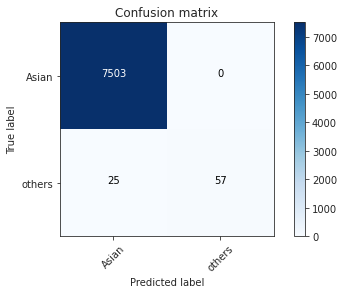

In [ ]:
plot_confusion_matrix(conf[0], classes= ['Asian','others'])